In [8]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Logistic Regression Classifier

## 1. Data

We create a toy data set with two classes using sklearn's make-blobs method.

X.shape = (1000, 2) y.shape = (1000,)


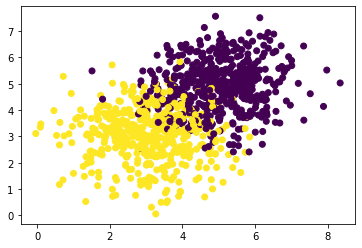

In [9]:
centers = np.array([[5, 5],[3, 3]])
X, y = make_blobs(n_samples=1000, n_features=2, centers=centers, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y)
print(f"X.shape = {X.shape} y.shape = {y.shape}")

## 2. Classifier

Recall, in Logistic Regression the prediction $h(\mathbf{x}_i)$ of the classifier is given as

$$
\hat{y}_i = h(\mathbf{x}_i) = p(y = 1 | \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x}_i)
$$

The activation function $\sigma(x)$ is given as $\sigma(a) = \frac{1}{1 + e^{-a}}$.

The vector $\mathbf{w}$ denotes the parameter vector $\mathbf{w} = (w_0, w_1, \ldots, w_p)^T$ and $\mathbf{x}_i = (1, x_{i,1}, x_{i,2}, \ldots, x_{i,p})$ the $i$-th data point.

Implement the Logistic Regression classifier. To find the parameters $\mathbf{w}$, use stochastic gradient ascent for maximizing the Log-Likelihood.

The gradient of the log-likelihood $\mathcal{L}(\mathbf{w})$ is given as:

$$
\nabla_\mathbf{w}\mathcal{L}(\mathbf{w}) = \sum_{i=1}^n (y_i - \sigma(\mathbf{w}^T \mathbf{x}_i)) \mathbf{x}_i
$$

## 2. Activation function

Implement the activation function $\sigma$.

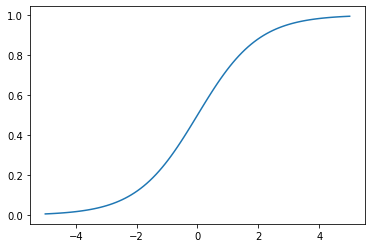

In [10]:
def sigma(x):
    return 1. / (1. + np.exp(-x))

x = np.linspace(-5, 5, num=100)
plt.plot(x, sigma(x))

## 3. Calculate the output of the Logistic Regression Classifier

Implement the ```predict``` method of the LogReg classifier to calculate the output of the model as

$$ \hat{y}_i = h(\mathbf{x}_i) = \sigma(\mathbf{w}^T \mathbf{x}_i)$$


## 4. Update parameters

Implement stochastic gradient ascent for maximizing the Likelihood function in the ```fit``` method below. 
- ```eta``` is the learning rate.
- ```n_epochs``` determines how often we cycle through the entire dataset and update the weights.

REPEAT for all data points and a number of epochs ```n_epochs```: 
1. Calculate the output of the Logistic Regression Classifier $h(\mathbf{x}_i) = \sigma(\mathbf{w}^T \mathbf{x}_i)$
2. Calculate the gradient for a single training data point $\nabla_{\mathbf{w}}\mathcal{L}(\mathbf{x}_i) = (y_i - h(\mathbf{x}_i)) \cdot \mathbf{x}_i$
3. Apply the update rule of gradient ascent: $\mathbf{w} = \mathbf{w} + \eta \nabla_{\mathbf{w}}\mathcal{L}(\mathbf{x}_i)$

In [11]:
class LogisticRegression(object):
    def __init__(self):
        pass
    
    def fit(self, X, y, n_epochs=1000, eta=0.1):
        
        n, d_m1 = X.shape
        
        # Add constant 1 to X
        Xn = np.concatenate([np.ones((n, 1)), X], axis=1)
        # Create parameter vector w initialized with all zeros
        self.w = np.zeros((d_m1 + 1,))
        
        for e in range(n_epochs):
            
            logLikelihood = 0.
            
            """
            Fast numpy version (calculates the correct gradient over all data points)
            NOTE: I added the factor (1./n) to make the learning rate independent from the number of examples
            """
            # y_hat = sigma(np.dot(Xn, self.w))
            
            # logLikelihood = np.sum(y * np.log(y_hat) + (1. - y) * np.log(1. - y_hat))
            
            # self.w += eta * (1./n) * np.sum(np.reshape((y - y_hat), (-1, 1)) * Xn, axis=0)
            
            """
            Slow python version (calculates the gradient from a single data point each time)
            """
            for i in range(n):
               
               y_hat = sigma(np.dot(Xn[i], self.w))
               
               dw = (y[i] - y_hat) * Xn[i]
               self.w += eta * dw
               
               logLikelihood += y[i] * np.log(y_hat) + (1-y[i]) * np.log(1 - y_hat)
            
            if e % 100 == 0:
                print(f"Epoch {e}: LogLikelihood: {logLikelihood}")
            
    def predict(self, X):
        
        n = len(X)
        
        # Store predictions
        y_hat = np.zeros(n)
        
        # Add column of constant 1 to X
        Xn = np.concatenate([np.ones((n,1)), X], axis=1)
        
        y_hat = sigma(np.dot(Xn, self.w))
        
        return y_hat
    
    def getWeights(self):
        return self.w

In [12]:
clf = LogisticRegression()
clf.fit(X, y)
y_hat = clf.predict(X)

Epoch 0: LogLikelihood: -633.5314618380544
Epoch 100: LogLikelihood: -312.91567787920525
Epoch 200: LogLikelihood: -313.0017682452474
Epoch 300: LogLikelihood: -313.0022077944228
Epoch 400: LogLikelihood: -313.0022100352028
Epoch 500: LogLikelihood: -313.0022100466256
Epoch 600: LogLikelihood: -313.0022100466828
Epoch 700: LogLikelihood: -313.0022100466828
Epoch 800: LogLikelihood: -313.0022100466828
Epoch 900: LogLikelihood: -313.0022100466828


In [13]:
def plotDataAndModel(X, y, w):
    
    n = 50
    x_ = np.linspace(0, 10, n)
    y_ = np.linspace(0, 10, n)
    
    zs = np.zeros((n, n))

    for i, x1 in enumerate(x_):
        for j, x2 in enumerate(y_):
            y_hat = clf.predict(np.array([[x1, x2]]))
            zs[i, j] = y_hat

    h = plt.contourf(x_, y_, zs, alpha=0.5)
    plt.axis('scaled')
    plt.colorbar()
    
    x1 = np.linspace(X[:,0].min(), X[:,1].max(), 100)
    x2 = - (w[1] / w[2]) * x1 - (w[0] / w[2])

    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x1, x2, linewidth=3, c='k')
    plt.show()

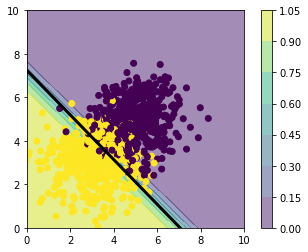

In [14]:
plotDataAndModel(X, y, clf.getWeights())